In [1]:
import pandas as pd
import numpy as np
import sys

sys.path.append(r"C:\Users\kimju\OneDrive\바탕 화면\Study\파이썬\git_repo\Sentiment_analysis\aihub\018.감성대화\Training_221115_add\원천데이터")
sys.path.append(r"C:\Users\kimju\OneDrive\바탕 화면\Study\파이썬\git_repo\Sentiment_analysis\aihub\018.감성대화\Validation_221115_add\원천데이터")

In [2]:
fin_t=pd.read_excel(r'aihub\018.감성대화\Training_221115_add\원천데이터\감성대화말뭉치(최종데이터)_Training.xlsx')
fin_v=pd.read_excel(r'aihub\018.감성대화\Validation_221115_add\원천데이터\감성대화말뭉치(최종데이터)_Validation.xlsx')

In [3]:
fin_t=fin_t.fillna("")
fin_v=fin_v.fillna("")

In [4]:
fin_t["사람문장"]=fin_t["사람문장1"].astype(str)+fin_t["사람문장2"].astype(str)+fin_t["사람문장3"].astype(str).astype(str)
fin_v["사람문장"]=fin_v["사람문장1"].astype(str)+fin_v["사람문장2"].astype(str)+fin_v["사람문장3"].astype(str).astype(str)

In [5]:
df_concat=pd.concat([fin_t,fin_v])

In [6]:
df_1=df_concat[["사람문장1","시스템문장1"]].rename(columns={"사람문장1":"사람문장","시스템문장1":"시스템문장"})
df_2=df_concat[["사람문장2","시스템문장2"]].rename(columns={"사람문장2":"사람문장","시스템문장2":"시스템문장"})
df_3=df_concat[["사람문장3","시스템문장3"]].rename(columns={"사람문장3":"사람문장","시스템문장3":"시스템문장"})


df_concat = pd.concat([df_1,df_2,df_3])


In [7]:
# 빈 문자열 제거
df_concat['사람문장'].str.strip()
df_concat['시스템문장'].str.strip()

0                             많이 힘드시겠어요. 주위에 의논할 상대가 있나요?
1                급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?
2       회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...
3       관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...
4       무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...
                              ...                        
6636                                                     
6637                                                     
6638                                                     
6639                                                     
6640                                                     
Name: 시스템문장, Length: 174813, dtype: object

In [8]:
df_concat['사람문장'].replace('', np.nan, inplace=True)
df_concat['시스템문장'].replace('', np.nan, inplace=True)

In [9]:
df_concat.dropna(inplace=True)

In [10]:
df_concat

,사람문장,시스템문장
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...
...,...,...
6556,말해봐도 소용이 없어.,말해도 친구가 계속 늦는군요.
6557,부모님께는 자주 찾아뵙는 게 우선일 거고 남편에겐 힘낼 수 있는 말을 자주 해 줄 ...,가족에게 감사한 마음을 표현하기로 하셨군요.
6576,좋아하는 노래를 한 곡 듣고 기분이 나아진 상태에서 친구들과 대화를 하면 좋을 것 같아.,노래를 들으며 기분 전환을 하시는군요.
6578,함께 점심도 먹고 친하게 지내고 있어.,점심도 먹으며 친구와 친하게 지내고 계시는군요.


In [11]:
final_df=df_concat.reset_index(drop=True)

In [12]:
from soynlp.normalizer import *
import re


def preprocessing(text):
    # 문제를 일으킬 수 있는 문자 제거
    bad_chars = {"\u200b": "", "…": " ... ", "\ufeff": ""}
    for bad_char in bad_chars:
        text = text.replace(bad_char, bad_chars[bad_char])
        
    error_chars = {"\u3000": " ", "\u2009": " ", "\u2002": " ", "\xa0":" "}
    for error_char in error_chars:
        text = text.replace(error_char, error_chars[error_char])
    
    # 이메일 제거
    text = re.sub(r"[a-zA-Z0-9+-_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", "[이메일]", text).strip()
    
    # "#문자" 형식 어절 제거
    text = re.sub(r"#\S+", "", text).strip()
    
    # "@문자" 형식 어절 제거
    text = re.sub(r"@\w+", "", text).strip()
    
    # URL 제거
    text = re.sub(r"(http|https)?:\/\/\S+\b|www\.(\w+\.)+\S*", "[웹주소]", text).strip()
    text = re.sub(r"pic\.(\w+\.)+\S*", "[웹주소]", text).strip()
    
    # 뉴스 저작권 관련 텍스트 제거
    re_patterns = [
        r"\<저작권자(\(c\)|ⓒ|©|\(Copyright\)|(\(c\))|(\(C\))).+?\>",
        r"저작권자\(c\)|ⓒ|©|(Copyright)|(\(c\))|(\(C\))"
    ]
    
    for re_pattern in re_patterns:
        text = re.sub(re_pattern, "", text).strip()
    
    # 뉴스 내 포함된 이미지에 대한 레이블 제거
    text = re.sub(r"\(출처 ?= ?.+\) |\(사진 ?= ?.+\) |\(자료 ?= ?.+\)| \(자료사진\) |사진=.+기자 ", "", text).strip()
    
    # 중복 문자 처리
    text = repeat_normalize(text, num_repeats=2).strip()

    # 문제를 일으킬 수 있는 구두점 치환
    punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }
    for p in punct_mapping:
        text = text.replace(p, punct_mapping[p])
    
    # 연속된 공백 치환
    text = re.sub(r"\s+", " ", text).strip()
    
    # 개행 문자 "\n" 제거
    text = text.replace('\n', '')

    # 기타 태그 제거
    text = re.sub('<.+?>', '', text, 0, re.I|re.S)
    
    return text

In [13]:
emoticon_normalize('ㅋㅋㅋㅋㅋㅋㅋㅋ??????ㅋㅋㅋㅋㅋ쿠ㅜㅜㅜㅜㅜㅜ', num_repeats=4)

'ㅋㅋㅋㅋ??????ㅋㅋㅋㅋㅜㅜㅜㅜ'

In [14]:
final_df['사람문장'] = final_df['사람문장'].apply(preprocessing)
final_df['시스템문장'] = final_df['시스템문장'].apply(preprocessing)

In [15]:
final_df["text"] = "### 질문: " +  final_df["사람문장"] +"\n\n### 답변: " + final_df["시스템문장"] + "<|endoftext|>"

In [16]:
# 열 삭제
final_df.drop(['사람문장', '시스템문장'], axis=1, inplace=True)

final_df1 = final_df[:50000]
final_df2 = final_df[50000:53000]

In [17]:
# 데이터 프레임의 마지막 3000개로 나누기
final_df3 = final_df[:-3000]
final_df4 = final_df[-3000:]

### 질문: 회사에서 내가 냈던 프로젝트 기획서가 책임님의 프로젝트가 됐어. 내가 아직 감당할 기량이 안 되긴 하지만 이런 게 맞는 걸까? 신입인 내가 이런 의견을 내도 되나 조심스러워.

### 답변: 직접 낸 기획이 다른 사람의 일이 되어서 조금 속상하고 어렵게 느껴지겠어요. 같은 회사에 이 일에 관련해서 물어볼 만한 사람이 있을까요?<|endoftext|>
### 질문: 아 결국 친구한테 빌려준 돈을 떼이게 생겼어. 급전이 필요하다고 부탁해서 여러차례 빌려준게 벌써 천 만원이 넘는데 십 년이 지나도 갚을 생각을 안하는것 같아 연락을 했더니 전화번호도 바꾸고 잠적해버렸네. 나뿐만 아니고 이 친구한테 당한 사람이 한둘이 아냐. 아주 상습범이더구만.

### 답변: 친구를 믿고 돈을 빌려주었는데 받지 못하게 되셔서 많이 속상하셨겠어요. 많이 친한 친구였나요?<|endoftext|>
### 질문: 아 결국 친구한테 빌려준 돈을 못 받게 생겼어. 급전이 필요하다고 부탁해서 여러차례 빌려준게 벌써 천 만원이 넘는데 십 년이 지나도 갚을 생각을 안하는것 같아 연락을 했더니 전화번호도 바꾸고 잠적해버렸네. 나뿐만 아니고 이 친구한테 당한 사람이 한둘이 아냐. 아주 상습범이더구만.

### 답변: 친구를 믿고 돈을 빌려주었는데 받지 못하게 되셔서 많이 속상하셨겠어요. 많이 친한 친구였나요?<|endoftext|>
### 질문: 친구들 모두 행복하게 연애 중인데 나는 연애를 하고 싶어도 좋은 인연을 만나지 못하고 있어. 같이 모임을 해도 모두 애인과 함께 오고 나만 혼자니까 열등감이 들어서 피하게 돼.

### 답변: 자신과는 다르게 행복하게 연애 중인 친구들을 보니 열등감이 느껴져 아주 속상하시군요. 이럴 때 기분이 나지려면 어떤 것이 좋을까요?<|endoftext|>
### 질문: 친구가 남자친구랑 해외여행을 가서 매일 사진을 올리고 있어. 나는 일에 치여서 남자친구 보기도 힘들고 휴가고 뭐고 아무것도 없는데 친구가 부러워서 질투가 나.

### 답변: 일에 바빠 남

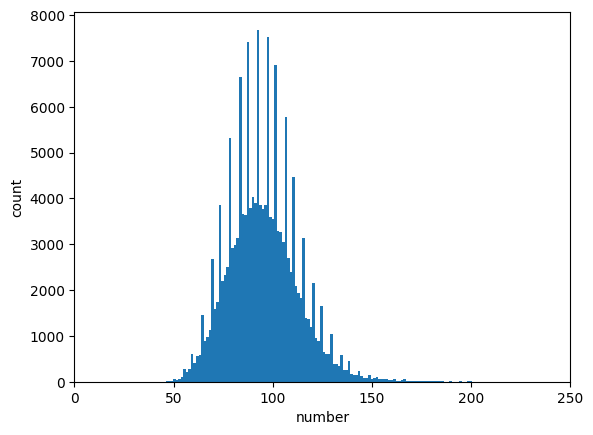

In [18]:
import matplotlib.pyplot as plt

t = []
for i in final_df['text']:
    t.append(len(i))
    if len(i)>200:
        print(i)
    
plt.hist(t, bins=200)
plt.xlim([0,250])
plt.xlabel('number')
plt.ylabel('count')
plt.show()


In [19]:
final_df3

,text
0,### 질문: 일은 왜 해도 해도 끝이 없을까? 화가 난다.\n\n### 답변: 많...
1,### 질문: 이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 ...
2,### 질문: 회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고...
3,### 질문: 직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데...
4,### 질문: 얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.\...
...,...
160917,### 질문: 서로 존댓말 쓰고 존중하는 표현을 써줬으면 좋겠어.\n\n### 답변...
160918,### 질문: 적어도 식비에 충분히 썼으면 좋겠어. 우리 나이에 돈 쓸데가 많지도 ...
160919,### 질문: 아무래도 내일은 아내한테 말을 해 봐야겠어. 체력을 기를 방법을 같이...
160920,### 질문: 딸네 집에 가서 맛있는 밥 한 끼 차려주고 싶어.\n\n### 답변:...


In [20]:
final_df4

,text
160922,### 질문: 입원한 병원에 찾아가서 병간호라도 해 줘야겠어.\n\n### 답변: ...
160923,### 질문: 아들과 많이 이야기를 나누고 싶어. 미안한 마음도 전하고 사랑한다고도...
160924,### 질문: 내일은 한의원에 가서 딸한테 줄 보약이라도 받아와야지.\n\n### ...
160925,### 질문: 이번 주말에 저녁 먹으면서 진지하게 대화를 해 봐야겠어.\n\n###...
160926,### 질문: 당분간은 가게를 쉬고 남편 병간호에 집중해야겠어.\n\n### 답변:...
...,...
163917,### 질문: 말해봐도 소용이 없어.\n\n### 답변: 말해도 친구가 계속 늦는군...
163918,### 질문: 부모님께는 자주 찾아뵙는 게 우선일 거고 남편에겐 힘낼 수 있는 말을...
163919,### 질문: 좋아하는 노래를 한 곡 듣고 기분이 나아진 상태에서 친구들과 대화를 ...
163920,### 질문: 함께 점심도 먹고 친하게 지내고 있어.\n\n### 답변: 점심도 먹...


In [24]:
final_df.to_json("all_test.json", orient = 'records', force_ascii=False)
final_df3.to_json("train.json", orient = 'records', force_ascii=False)
final_df4.to_json("valid.json", orient = 'records', force_ascii=False)

In [23]:
final_df4

,text
160922,### 질문: 입원한 병원에 찾아가서 병간호라도 해 줘야겠어.\n\n### 답변: ...
160923,### 질문: 아들과 많이 이야기를 나누고 싶어. 미안한 마음도 전하고 사랑한다고도...
160924,### 질문: 내일은 한의원에 가서 딸한테 줄 보약이라도 받아와야지.\n\n### ...
160925,### 질문: 이번 주말에 저녁 먹으면서 진지하게 대화를 해 봐야겠어.\n\n###...
160926,### 질문: 당분간은 가게를 쉬고 남편 병간호에 집중해야겠어.\n\n### 답변:...
...,...
163917,### 질문: 말해봐도 소용이 없어.\n\n### 답변: 말해도 친구가 계속 늦는군...
163918,### 질문: 부모님께는 자주 찾아뵙는 게 우선일 거고 남편에겐 힘낼 수 있는 말을...
163919,### 질문: 좋아하는 노래를 한 곡 듣고 기분이 나아진 상태에서 친구들과 대화를 ...
163920,### 질문: 함께 점심도 먹고 친하게 지내고 있어.\n\n### 답변: 점심도 먹...


In [22]:
final_df3

,text
0,### 질문: 일은 왜 해도 해도 끝이 없을까? 화가 난다.\n\n### 답변: 많...
1,### 질문: 이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 ...
2,### 질문: 회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고...
3,### 질문: 직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데...
4,### 질문: 얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.\...
...,...
160917,### 질문: 서로 존댓말 쓰고 존중하는 표현을 써줬으면 좋겠어.\n\n### 답변...
160918,### 질문: 적어도 식비에 충분히 썼으면 좋겠어. 우리 나이에 돈 쓸데가 많지도 ...
160919,### 질문: 아무래도 내일은 아내한테 말을 해 봐야겠어. 체력을 기를 방법을 같이...
160920,### 질문: 딸네 집에 가서 맛있는 밥 한 끼 차려주고 싶어.\n\n### 답변:...


In [21]:
final_df

,text
0,### 질문: 일은 왜 해도 해도 끝이 없을까? 화가 난다.\n\n### 답변: 많...
1,### 질문: 이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 ...
2,### 질문: 회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고...
3,### 질문: 직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데...
4,### 질문: 얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.\...
...,...
163917,### 질문: 말해봐도 소용이 없어.\n\n### 답변: 말해도 친구가 계속 늦는군...
163918,### 질문: 부모님께는 자주 찾아뵙는 게 우선일 거고 남편에겐 힘낼 수 있는 말을...
163919,### 질문: 좋아하는 노래를 한 곡 듣고 기분이 나아진 상태에서 친구들과 대화를 ...
163920,### 질문: 함께 점심도 먹고 친하게 지내고 있어.\n\n### 답변: 점심도 먹...
